Data preparation

In [1]:
import os
from zipfile import ZipFile

# app.py
# call api 
# 1. According to kaggle website, api call require install package in pip -> pip install )
# 2. After install go to kaggle account page  https://www.kaggle.com/<username>/account to get api token
# 3. Place downloaded json file C:\Users\<Windows-username>\.kaggle\kaggle.json
os.system("kaggle datasets download -d olistbr/brazilian-ecommerce")
with ZipFile('brazilian-ecommerce.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()


os.system("kaggle datasets download -d olistbr/marketing-funnel-olist")
with ZipFile('marketing-funnel-olist.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('max_colwidth',100)

In [3]:
customers = pd.read_csv('olist_customers_dataset.csv')
customers=pd.read_csv('olist_customers_dataset.csv')
geolocation=pd.read_csv('olist_geolocation_dataset.csv')
order_items=pd.read_csv('olist_order_items_dataset.csv')
order_payments=pd.read_csv('olist_order_payments_dataset.csv')
order_reviews=pd.read_csv('olist_order_reviews_dataset.csv')
orders=pd.read_csv('olist_orders_dataset.csv')
products=pd.read_csv('olist_products_dataset.csv')
sellers=pd.read_csv('olist_sellers_dataset.csv')
translation=pd.read_csv('product_category_name_translation.csv')

In [4]:
#Connect table,Concatenating DataFrames
order_merge_list=[order_items,order_payments,order_reviews]

for item in order_merge_list:
	orders=pd.merge(orders,item,on='order_id',how='left')

orders=pd.merge(orders,products,on='product_id',how='left')

# translate product_category_name to English
orders_full=pd.merge(orders,translation,on='product_category_name',how='left')
sellers_geo=pd.merge(sellers,geolocation,left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix')
customers_geo=pd.merge(customers,geolocation,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix')

In [5]:
orders_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [6]:
#Define time series
date_cols=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date' ,'order_estimated_delivery_date','shipping_limit_date','review_creation_date','review_answer_timestamp']
for item in date_cols:
    orders_full[item]=pd.to_datetime(orders_full[item])
orders_full.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119151 non-null  object        
 1   customer_id                    119151 non-null  object        
 2   order_status                   119151 non-null  object        
 3   order_purchase_timestamp       119151 non-null  datetime64[ns]
 4   order_approved_at              118974 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117065 non-null  datetime64[ns]
 6   order_delivered_customer_date  115730 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119151 non-null  datetime64[ns]
 8   order_item_id                  118318 non-null  float64       
 9   product_id                     118318 non-null  object        
 10  seller_id                      118318 non-null  object        
 11  

Count the sales of different category

In [1]:

plt.subplots()
product_counts=orders_full.groupby(['product_category_name_english']).size().sort_values()
product_counts.plot(kind='barh',figsize=(10,40),title='Product Category')
plt.style.use('ggplot')

NameError: name 'plt' is not defined

The overview of the top 5 Category's review_score 

Calculate the avg_review_score and sales amount for each seller from each category

In [8]:
from collections import Counter

# create DataFrame with only have data: 'seller_id', 'review_score', 'product_category_name_english','order_status'
review_score = pd.DataFrame(orders_full[['seller_id', 'review_score', 'product_category_name_english','order_status']])


Seller = pd.DataFrame(review_score[review_score['order_status']!='canceled'])
Seller = pd.DataFrame(review_score[review_score['order_status']!='unavailable'])

# add new column to show the avg_review_score and num of 
Seller['avg_review_score'] = Seller.groupby(['seller_id','product_category_name_english'])['review_score'].transform('mean')
Seller['sales'] = Seller.groupby(['seller_id','product_category_name_english'])['seller_id'].transform('count')



In [9]:

category_list=['bed_bath_table', 'health_beauty', 'sports_leisure','furniture_decor','computers_accessories']


def creat_direct(category):
    data= pd.DataFrame(Seller[Seller['product_category_name_english']==category])
    data_review=data.loc[:,['review_score']]
    train_data = np.array(data_review)
    list1=train_data.tolist()
    list2=[]
    for item in list1:
        list2.extend(item)
    return list2


    
def get_count_by_counter(l):   
    count=Counter(l)
    count_direct = dict(count)
    #print(count_direct)
    return(count_direct)
    

category_set=[]
for item in category_list:
    data_list=creat_direct(item)
    count_direct = get_count_by_counter(data_list)
    data=[]
    i=1
    data.append(item)
    while(i<6):
        data.append(count_direct[i])
        i=i+1
    category_set.append(data)
    

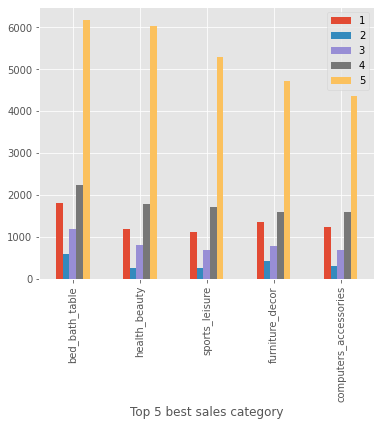

In [10]:
df=pd.DataFrame(category_set,columns=["Top 5 best sales category",1,2,3,4,5])
df.plot(x="Top 5 best sales category", y=[1,2,3,4,5], kind="bar",figsize=(6,5))
plt.show()

Table show Sales Amount and Average Review Score

In [11]:
#only use the data whose the the num of review is more than 50
Seller_review = pd.DataFrame(Seller[Seller['sales']>50])

Seller_review.drop(columns='review_score', inplace=True)
Seller_review.drop(columns='order_status', inplace=True)

In [12]:
Seller_review.head()

,seller_id,product_category_name_english,avg_review_score,sales
3,289cdb325fb7e7f891c38608bf9e0962,perfumery,4.577586,116.0
5,66922902710d126a0e7d26b0e3805106,pet_shop,4.441718,163.0
6,2c9e548be18521d1c43cde1c582c6de8,stationery,3.755556,135.0
7,8581055ce74af1daba164fdbd55a40de,auto,4.231441,458.0
9,16090f2ca825584b5a147ab24aa30c86,auto,4.050584,257.0


Analysis - Data Set: the sales from all category

In [13]:
# create DataFrame with only have data: 'seller_id', 'review_score', 'product_category_name_english'
review_score = pd.DataFrame(orders_full[['seller_id', 'review_score', 'product_category_name_english','order_status']])


Seller = pd.DataFrame(review_score[review_score['order_status']!='canceled'])
Seller = pd.DataFrame(review_score[review_score['order_status']!='unavailable'])

# add new column to show the avg_review_score and num of 
Seller['avg_review_score'] = Seller.groupby(['seller_id','product_category_name_english'])['review_score'].transform('mean')
Seller['sales'] = Seller.groupby(['seller_id','product_category_name_english'])['seller_id'].transform('count')

#delect duplicates
Seller.drop_duplicates(["seller_id",'product_category_name_english'],'first',inplace=True)
Seller.drop(columns='review_score', inplace=True)


#only use the data whose the the num of review is more than 50
Seller_review = pd.DataFrame(Seller[Seller['sales']>50])


In [14]:

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Recall the Total-HP Dataset
total = pd.DataFrame(Seller['sales'])   # Response
hp =pd.DataFrame(Seller['avg_review_score'])         # Predictor

# Split the Dataset into Train and Test
hp_train, hp_test, total_train, total_test = train_test_split(hp, total, test_size = 0.25)

<AxesSubplot:>

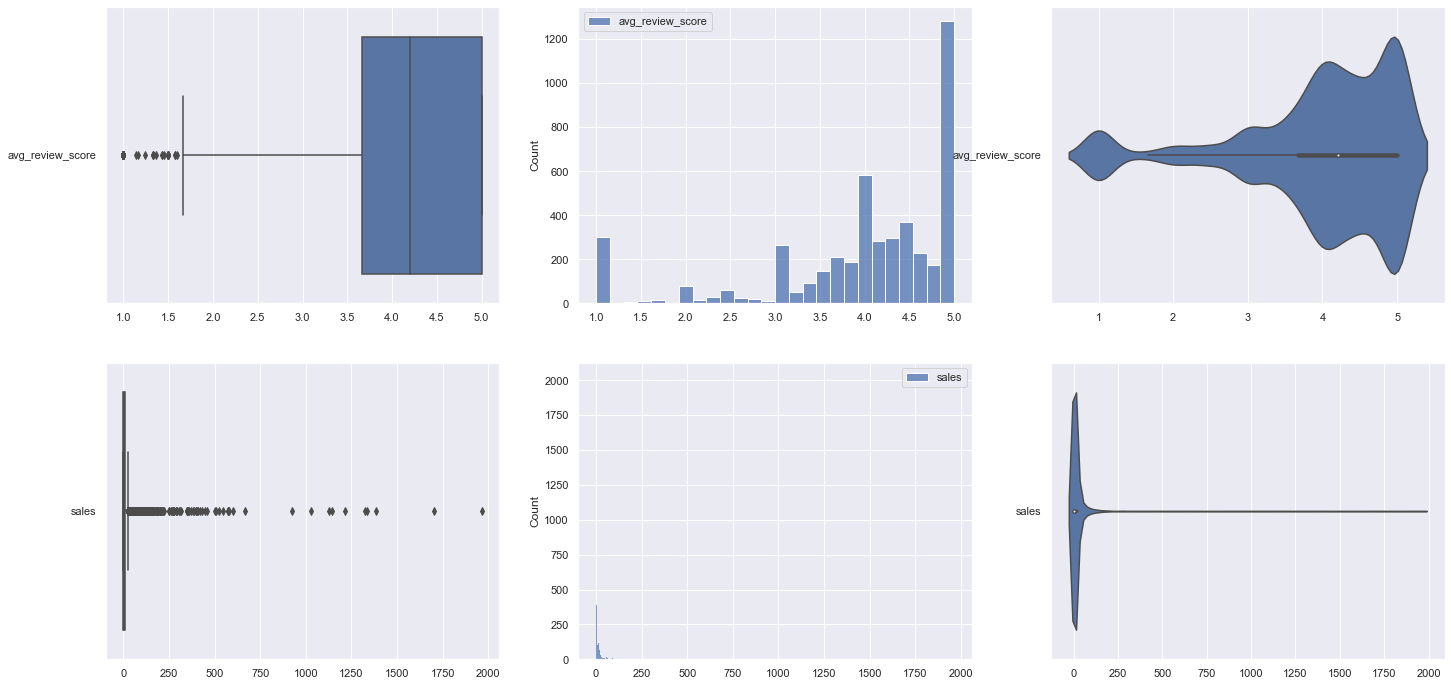

In [15]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP Train
sb.boxplot(data = hp_train, orient = "h", ax = axes[0,0])
sb.histplot(data = hp_train, ax = axes[0,1])
sb.violinplot(data = hp_train, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(data = total_train, orient = "h", ax = axes[1,0])
sb.histplot(data = total_train, ax = axes[1,1])
sb.violinplot(data = total_train, orient = "h", ax = axes[1,2])

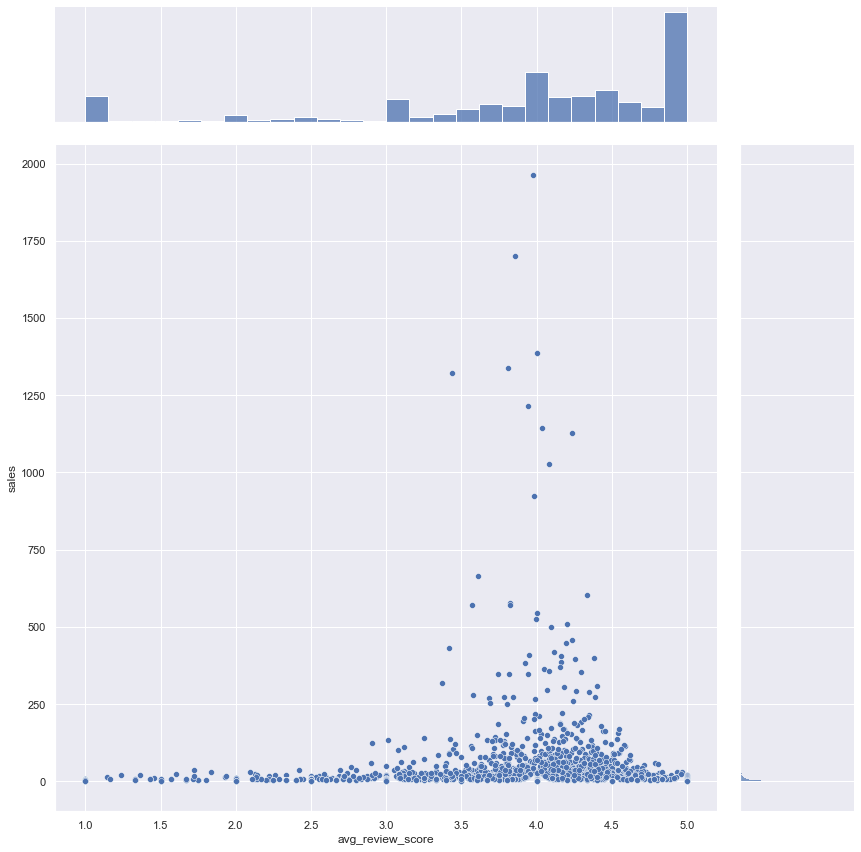

In [16]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([hp_train, total_train], axis = 1).reindex(hp_train.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = trainDF, x = "avg_review_score", y = "sales", height = 12)

<AxesSubplot:>

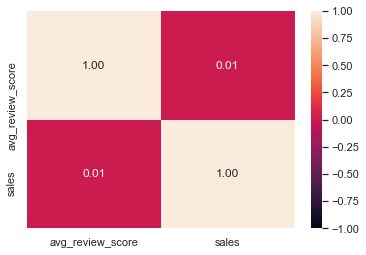

In [17]:
# Calculate the correlation between the two columns/variables
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

Analysis - Data Set: the sales from all category

In [18]:

data= pd.DataFrame(Seller_review[Seller_review['product_category_name_english']=='bed_bath_table'])
# Recall the Total-HP Dataset
total = pd.DataFrame(data['sales'])   # Response
hp =pd.DataFrame(data['avg_review_score'])         # Predictor

# Split the Dataset into Train and Test
hp_train, hp_test, total_train, total_test = train_test_split(hp, total, test_size = 0.25)

<AxesSubplot:>

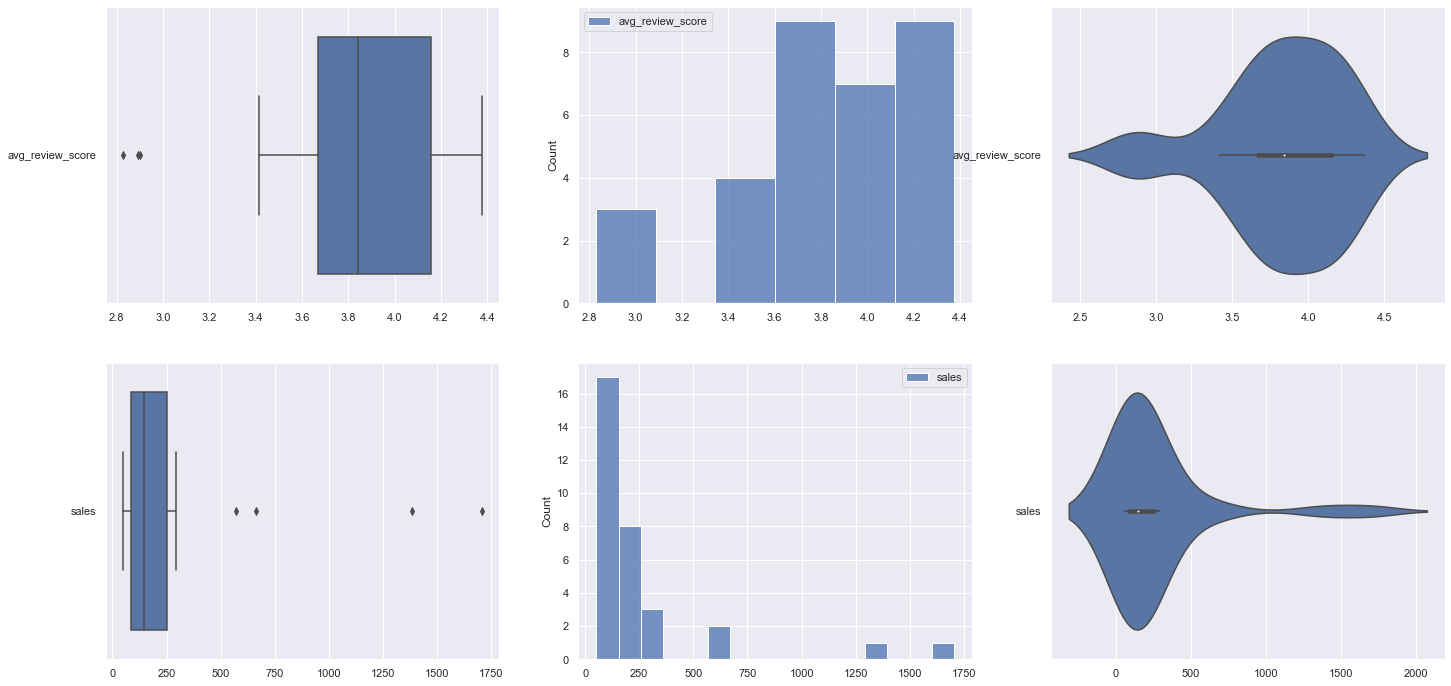

In [19]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP Train
sb.boxplot(data = hp_train, orient = "h", ax = axes[0,0])
sb.histplot(data = hp_train, ax = axes[0,1])
sb.violinplot(data = hp_train, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(data = total_train, orient = "h", ax = axes[1,0])
sb.histplot(data = total_train, ax = axes[1,1])
sb.violinplot(data = total_train, orient = "h", ax = axes[1,2])

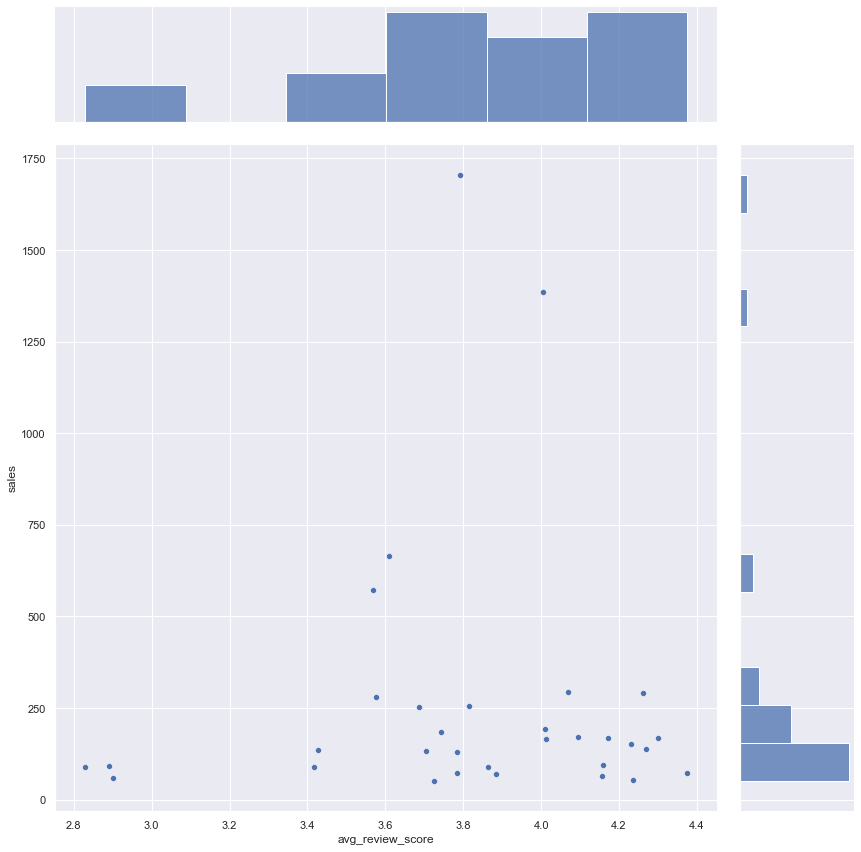

In [20]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([hp_train, total_train], axis = 1).reindex(hp_train.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = trainDF, x = "avg_review_score", y = "sales", height = 12)

<AxesSubplot:>

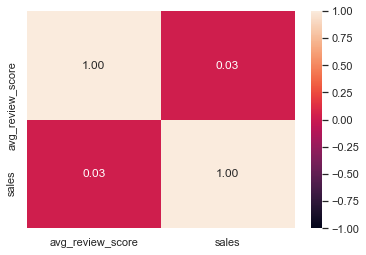

In [21]:
# Calculate the correlation between the two columns/variables
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")